In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [47]:
data = pd.read_csv('외부데이터추가.csv', low_memory = False).iloc[:,1:]
data

,BERTH_PLAN_LOG_ID,TERMINAL,YEAR,VESSEL_CD,VOYAGE,BERTHN_DTM,DEP_DTM,LOD_CNT,DIS_CNT,SHFT_CNT,...,위치,부두길이(m),전면수심(m),부지면적(^m),하역능력(TEU),접안능력(1만),접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤)
0,1198856,BIT,2020,COTW,1,20200102000000,20200102140000,250,250,0,...,부산,1224,16.25,768125,1998100,0,0,0,0,4
1,1198857,BNCT,2019,CATO,005,20191230103600,20191231235000,1100,539,88,...,부산,1400,17.00,785000,2440000,0,0,0,0,4
2,1198858,BNCT,2020,LDIN,006,20200101100000,20200102060000,648,513,54,...,부산,1400,17.00,785000,2440000,0,0,0,0,4
3,1198859,HPNT,2019,HHBS,001,20191231110000,20200101040000,405,641,120,...,부산,1150,16.50,553000,1936000,0,2,0,0,2
4,1198860,HPNT,2019,HHVC,001,20191231120000,20200101100000,837,1421,322,...,부산,1150,16.50,553000,1936000,0,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145842,3545254,GWCT,2022,NITR,0010,20220808213000,20220809070000,0,365,0,...,광양,1400,16.00,840000,1632000,0,0,0,0,4
2145843,3545255,GWCT,2022,DYHY,0013,20220809083000,20220809153000,72,52,0,...,광양,1400,16.00,840000,1632000,0,0,0,0,4
2145844,3545246,ICT,2022,OWNN,0008,20220814023000,20220814230000,0,0,0,...,인천,600,14.00,195000,552000,0,0,0,2,0
2145845,3545257,PNC,2022,MGUD,003,20220809070000,20220810030000,972,715,354,...,부산,2000,16.50,1210000,3677000,0,0,0,0,6


In [48]:
data.head(30)

,BERTH_PLAN_LOG_ID,TERMINAL,YEAR,VESSEL_CD,VOYAGE,BERTHN_DTM,DEP_DTM,LOD_CNT,DIS_CNT,SHFT_CNT,...,위치,부두길이(m),전면수심(m),부지면적(^m),하역능력(TEU),접안능력(1만),접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤)
0,1198856,BIT,2020,COTW,1,20200102000000,20200102140000,250,250,0,...,부산,1224,16.25,768125,1998100,0,0,0,0,4
1,1198857,BNCT,2019,CATO,005,20191230103600,20191231235000,1100,539,88,...,부산,1400,17.00,785000,2440000,0,0,0,0,4
2,1198858,BNCT,2020,LDIN,006,20200101100000,20200102060000,648,513,54,...,부산,1400,17.00,785000,2440000,0,0,0,0,4
3,1198859,HPNT,2019,HHBS,001,20191231110000,20200101040000,405,641,120,...,부산,1150,16.50,553000,1936000,0,2,0,0,2
4,1198860,HPNT,2019,HHVC,001,20191231120000,20200101100000,837,1421,322,...,부산,1150,16.50,553000,1936000,0,2,0,0,2
5,1198861,PNC,2019,ATOX,007,20191231060000,20200101130000,1038,1632,464,...,부산,2000,16.50,1210000,3677000,0,0,0,0,6
6,1198862,PNC,2019,OMQL,004,20191231202500,20200102220000,1515,3843,428,...,부산,2000,16.50,1210000,3677000,0,0,0,0,6
7,1198871,BPTC,2020,MIBH,1,20200101130000,20200102050000,250,300,0,...,부산,1500,15.50,1151000,2236000,0,0,0,0,5
8,1198890,BIT,2020,RUCH,1,20200101100000,20200102050000,322,368,0,...,부산,1224,16.25,768125,1998100,0,0,0,0,4
9,1198899,PNC,2019,OMQL,004,20191231202500,20200102220000,1549,3855,360,...,부산,2000,16.50,1210000,3677000,0,0,0,0,6


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145847 entries, 0 to 2145846
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   BERTH_PLAN_LOG_ID  int64  
 1   TERMINAL           object 
 2   YEAR               int64  
 3   VESSEL_CD          object 
 4   VOYAGE             object 
 5   BERTHN_DTM         int64  
 6   DEP_DTM            int64  
 7   LOD_CNT            int64  
 8   DIS_CNT            int64  
 9   SHFT_CNT           int64  
 10  REG_DATE           int64  
 11  기온(°C)             float64
 12  강수량(mm)            float64
 13  풍속(m/s)            float64
 14  위치                 object 
 15  부두길이(m)            object 
 16  전면수심(m)            float64
 17  부지면적(^m)           int64  
 18  하역능력(TEU)          int64  
 19  접안능력(1만)           int64  
 20  접안능력(2만)           int64  
 21  접안능력(3만)           int64  
 22  접안능력(4만)           int64  
 23  접안능력(5만톤)          int64  
dtypes: float64(4), int64(15), object(5)
memory usage: 

In [50]:
# 주어진 예제와 똑같은 조건으로 중복되는 경우  

data1 = data[data['TERMINAL'] == 'BNCT']
data2 = data1[data1['YEAR'] == 2021]
data3 = data2[data2['VESSEL_CD'] == 'CANN']
data4 = data3[data3['VOYAGE'] == '005']
data4

,BERTH_PLAN_LOG_ID,TERMINAL,YEAR,VESSEL_CD,VOYAGE,BERTHN_DTM,DEP_DTM,LOD_CNT,DIS_CNT,SHFT_CNT,...,위치,부두길이(m),전면수심(m),부지면적(^m),하역능력(TEU),접안능력(1만),접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤)
1841995,3222654,BNCT,2021,CANN,005,20211226000000,20211227000000,500,2000,0,...,부산,1400,17.0,785000,2440000,0,0,0,0,4
1862519,3244990,BNCT,2021,CANN,005,20211228020000,20211229000000,800,1000,0,...,부산,1400,17.0,785000,2440000,0,0,0,0,4
1864215,3246819,BNCT,2021,CANN,005,20211230020000,20211231000000,800,1000,0,...,부산,1400,17.0,785000,2440000,0,0,0,0,4
1864819,3247491,BNCT,2021,CANN,005,20211229160000,20211231060000,800,1000,0,...,부산,1400,17.0,785000,2440000,0,0,0,0,4
1867988,3250798,BNCT,2021,CANN,005,20211229160000,20211231060000,800,1500,0,...,부산,1400,17.0,785000,2440000,0,0,0,0,4
1869971,3252800,BNCT,2021,CANN,005,20211230160000,20211231220000,800,1500,0,...,부산,1400,17.0,785000,2440000,0,0,0,0,4
1874664,3257585,BNCT,2021,CANN,005,20211230040000,20211231160000,800,1500,0,...,부산,1400,17.0,785000,2440000,0,0,0,0,4
1874999,3257903,BNCT,2021,CANN,005,20211230140000,20220101020000,800,1500,0,...,부산,1400,17.0,785000,2440000,0,0,0,0,4
1876367,3259443,BNCT,2021,CANN,005,20211230140000,20220101020000,800,1526,0,...,부산,1400,17.0,785000,2440000,0,0,0,0,4
1876763,3259853,BNCT,2021,CANN,005,20211230140000,20211231220000,100,1526,0,...,부산,1400,17.0,785000,2440000,0,0,0,0,4


In [51]:
# 다음과 같은 기준으로 중복되는 데이터 제거, 중복 되는 데이터 중 마지막 것을 선택
# 1. Terminal 이름(TERMINAL)
# 2. 선박의 이름(VESSEL_CD)
# 3. 년간 정박 횟수 (VOYAGE)
# 4. 년도 (YEAR)



new_data = data.drop_duplicates(subset = ['TERMINAL', 'VESSEL_CD','YEAR', 'VOYAGE'], keep = 'last', ignore_index = True)
new_data

,BERTH_PLAN_LOG_ID,TERMINAL,YEAR,VESSEL_CD,VOYAGE,BERTHN_DTM,DEP_DTM,LOD_CNT,DIS_CNT,SHFT_CNT,...,위치,부두길이(m),전면수심(m),부지면적(^m),하역능력(TEU),접안능력(1만),접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤)
0,1198857,BNCT,2019,CATO,005,20191230103600,20191231235000,1100,539,88,...,부산,1400,17.0,785000,2440000,0,0,0,0,4
1,1198903,PNIT,2019,DWFM,032,20191231170000,20200101010000,135,61,0,...,부산,1200,16.0,840000,2091000,0,0,0,0,3
2,1198916,PCTC,2019,PCCR,073/2019,20191231125700,20200101025700,0,0,0,...,평택,1040,14.0,416000,1000000,0,0,2,0,2
3,1198958,PNC,2019,ONIS,030,20191231110000,20200101080000,896,1000,0,...,부산,2000,16.5,1210000,3677000,0,0,0,0,6
4,1198998,HJIT,2020,DPUX,001,20200101010000,20200101052000,0,238,0,...,인천,800,18.0,480000,1104000,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69781,3545254,GWCT,2022,NITR,0010,20220808213000,20220809070000,0,365,0,...,광양,1400,16.0,840000,1632000,0,0,0,0,4
69782,3545255,GWCT,2022,DYHY,0013,20220809083000,20220809153000,72,52,0,...,광양,1400,16.0,840000,1632000,0,0,0,0,4
69783,3545246,ICT,2022,OWNN,0008,20220814023000,20220814230000,0,0,0,...,인천,600,14.0,195000,552000,0,0,0,2,0
69784,3545257,PNC,2022,MGUD,003,20220809070000,20220810030000,972,715,354,...,부산,2000,16.5,1210000,3677000,0,0,0,0,6


In [52]:
# 위의 예시에서 맨 마지막인 ID 3268336 있는지 확인 - 있음 


new_data[new_data['BERTH_PLAN_LOG_ID'] == 3268336]

,BERTH_PLAN_LOG_ID,TERMINAL,YEAR,VESSEL_CD,VOYAGE,BERTHN_DTM,DEP_DTM,LOD_CNT,DIS_CNT,SHFT_CNT,...,위치,부두길이(m),전면수심(m),부지면적(^m),하역능력(TEU),접안능력(1만),접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤)
52671,3268336,BNCT,2021,CANN,005,20211230110600,20211231235900,92,1525,1042,...,부산,1400,17.0,785000,2440000,0,0,0,0,4


In [53]:
# 위의 예시에서 뒤에서 두번째인 ID 3267271 있는지 확인 - 없음 - 정상적으로 중복 제거 된 것을 확인할 수 있음 

new_data[new_data['BERTH_PLAN_LOG_ID'] == 3267271]

,BERTH_PLAN_LOG_ID,TERMINAL,YEAR,VESSEL_CD,VOYAGE,BERTHN_DTM,DEP_DTM,LOD_CNT,DIS_CNT,SHFT_CNT,...,위치,부두길이(m),전면수심(m),부지면적(^m),하역능력(TEU),접안능력(1만),접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤)


In [54]:
new_data.to_csv('중복제거 data.csv')

In [55]:
중복제거_data = pd.read_csv('중복제거 data.csv', low_memory = False).iloc[:,1:]
중복제거_data

,BERTH_PLAN_LOG_ID,TERMINAL,YEAR,VESSEL_CD,VOYAGE,BERTHN_DTM,DEP_DTM,LOD_CNT,DIS_CNT,SHFT_CNT,...,위치,부두길이(m),전면수심(m),부지면적(^m),하역능력(TEU),접안능력(1만),접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤)
0,1198857,BNCT,2019,CATO,005,20191230103600,20191231235000,1100,539,88,...,부산,1400,17.0,785000,2440000,0,0,0,0,4
1,1198903,PNIT,2019,DWFM,032,20191231170000,20200101010000,135,61,0,...,부산,1200,16.0,840000,2091000,0,0,0,0,3
2,1198916,PCTC,2019,PCCR,073/2019,20191231125700,20200101025700,0,0,0,...,평택,1040,14.0,416000,1000000,0,0,2,0,2
3,1198958,PNC,2019,ONIS,030,20191231110000,20200101080000,896,1000,0,...,부산,2000,16.5,1210000,3677000,0,0,0,0,6
4,1198998,HJIT,2020,DPUX,001,20200101010000,20200101052000,0,238,0,...,인천,800,18.0,480000,1104000,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69781,3545254,GWCT,2022,NITR,0010,20220808213000,20220809070000,0,365,0,...,광양,1400,16.0,840000,1632000,0,0,0,0,4
69782,3545255,GWCT,2022,DYHY,0013,20220809083000,20220809153000,72,52,0,...,광양,1400,16.0,840000,1632000,0,0,0,0,4
69783,3545246,ICT,2022,OWNN,0008,20220814023000,20220814230000,0,0,0,...,인천,600,14.0,195000,552000,0,0,0,2,0
69784,3545257,PNC,2022,MGUD,003,20220809070000,20220810030000,972,715,354,...,부산,2000,16.5,1210000,3677000,0,0,0,0,6


In [56]:

def int_to_datetime(x):
    return datetime.strptime(str(x), '%Y%m%d%H%M%S')


중복제거_data['BERTHN_DTM'] = 중복제거_data['BERTHN_DTM'].apply(lambda x: int_to_datetime(x))
중복제거_data['DEP_DTM'] = 중복제거_data['DEP_DTM'].apply(lambda x: int_to_datetime(x))
중복제거_data['REG_DATE'] = 중복제거_data['REG_DATE'].apply(lambda x: int_to_datetime(x))

중복제거_data


,BERTH_PLAN_LOG_ID,TERMINAL,YEAR,VESSEL_CD,VOYAGE,BERTHN_DTM,DEP_DTM,LOD_CNT,DIS_CNT,SHFT_CNT,...,위치,부두길이(m),전면수심(m),부지면적(^m),하역능력(TEU),접안능력(1만),접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤)
0,1198857,BNCT,2019,CATO,005,2019-12-30 10:36:00,2019-12-31 23:50:00,1100,539,88,...,부산,1400,17.0,785000,2440000,0,0,0,0,4
1,1198903,PNIT,2019,DWFM,032,2019-12-31 17:00:00,2020-01-01 01:00:00,135,61,0,...,부산,1200,16.0,840000,2091000,0,0,0,0,3
2,1198916,PCTC,2019,PCCR,073/2019,2019-12-31 12:57:00,2020-01-01 02:57:00,0,0,0,...,평택,1040,14.0,416000,1000000,0,0,2,0,2
3,1198958,PNC,2019,ONIS,030,2019-12-31 11:00:00,2020-01-01 08:00:00,896,1000,0,...,부산,2000,16.5,1210000,3677000,0,0,0,0,6
4,1198998,HJIT,2020,DPUX,001,2020-01-01 01:00:00,2020-01-01 05:20:00,0,238,0,...,인천,800,18.0,480000,1104000,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69781,3545254,GWCT,2022,NITR,0010,2022-08-08 21:30:00,2022-08-09 07:00:00,0,365,0,...,광양,1400,16.0,840000,1632000,0,0,0,0,4
69782,3545255,GWCT,2022,DYHY,0013,2022-08-09 08:30:00,2022-08-09 15:30:00,72,52,0,...,광양,1400,16.0,840000,1632000,0,0,0,0,4
69783,3545246,ICT,2022,OWNN,0008,2022-08-14 02:30:00,2022-08-14 23:00:00,0,0,0,...,인천,600,14.0,195000,552000,0,0,0,2,0
69784,3545257,PNC,2022,MGUD,003,2022-08-09 07:00:00,2022-08-10 03:00:00,972,715,354,...,부산,2000,16.5,1210000,3677000,0,0,0,0,6


In [57]:
def work_time(x):
    a = (x['DEP_DTM'] - x['BERTHN_DTM']).seconds / 60
    b = (x['DEP_DTM'] - x['BERTHN_DTM']).days * 1440
    
    return a+b

중복제거_data['작업시간(분)'] = 중복제거_data.apply(lambda x: work_time(x), axis= 1)
중복제거_data

,BERTH_PLAN_LOG_ID,TERMINAL,YEAR,VESSEL_CD,VOYAGE,BERTHN_DTM,DEP_DTM,LOD_CNT,DIS_CNT,SHFT_CNT,...,부두길이(m),전면수심(m),부지면적(^m),하역능력(TEU),접안능력(1만),접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤),작업시간(분)
0,1198857,BNCT,2019,CATO,005,2019-12-30 10:36:00,2019-12-31 23:50:00,1100,539,88,...,1400,17.0,785000,2440000,0,0,0,0,4,2234.0
1,1198903,PNIT,2019,DWFM,032,2019-12-31 17:00:00,2020-01-01 01:00:00,135,61,0,...,1200,16.0,840000,2091000,0,0,0,0,3,480.0
2,1198916,PCTC,2019,PCCR,073/2019,2019-12-31 12:57:00,2020-01-01 02:57:00,0,0,0,...,1040,14.0,416000,1000000,0,0,2,0,2,840.0
3,1198958,PNC,2019,ONIS,030,2019-12-31 11:00:00,2020-01-01 08:00:00,896,1000,0,...,2000,16.5,1210000,3677000,0,0,0,0,6,1260.0
4,1198998,HJIT,2020,DPUX,001,2020-01-01 01:00:00,2020-01-01 05:20:00,0,238,0,...,800,18.0,480000,1104000,0,0,2,1,0,260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69781,3545254,GWCT,2022,NITR,0010,2022-08-08 21:30:00,2022-08-09 07:00:00,0,365,0,...,1400,16.0,840000,1632000,0,0,0,0,4,570.0
69782,3545255,GWCT,2022,DYHY,0013,2022-08-09 08:30:00,2022-08-09 15:30:00,72,52,0,...,1400,16.0,840000,1632000,0,0,0,0,4,420.0
69783,3545246,ICT,2022,OWNN,0008,2022-08-14 02:30:00,2022-08-14 23:00:00,0,0,0,...,600,14.0,195000,552000,0,0,0,2,0,1230.0
69784,3545257,PNC,2022,MGUD,003,2022-08-09 07:00:00,2022-08-10 03:00:00,972,715,354,...,2000,16.5,1210000,3677000,0,0,0,0,6,1200.0


In [103]:
data = 중복제거_data.copy()
data

,BERTH_PLAN_LOG_ID,TERMINAL,YEAR,VESSEL_CD,VOYAGE,BERTHN_DTM,DEP_DTM,LOD_CNT,DIS_CNT,SHFT_CNT,...,부두길이(m),전면수심(m),부지면적(^m),하역능력(TEU),접안능력(1만),접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤),작업시간(분)
0,1198857,BNCT,2019,CATO,005,2019-12-30 10:36:00,2019-12-31 23:50:00,1100,539,88,...,1400,17.0,785000,2440000,0,0,0,0,4,2234.0
1,1198903,PNIT,2019,DWFM,032,2019-12-31 17:00:00,2020-01-01 01:00:00,135,61,0,...,1200,16.0,840000,2091000,0,0,0,0,3,480.0
2,1198916,PCTC,2019,PCCR,073/2019,2019-12-31 12:57:00,2020-01-01 02:57:00,0,0,0,...,1040,14.0,416000,1000000,0,0,2,0,2,840.0
3,1198958,PNC,2019,ONIS,030,2019-12-31 11:00:00,2020-01-01 08:00:00,896,1000,0,...,2000,16.5,1210000,3677000,0,0,0,0,6,1260.0
4,1198998,HJIT,2020,DPUX,001,2020-01-01 01:00:00,2020-01-01 05:20:00,0,238,0,...,800,18.0,480000,1104000,0,0,2,1,0,260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69781,3545254,GWCT,2022,NITR,0010,2022-08-08 21:30:00,2022-08-09 07:00:00,0,365,0,...,1400,16.0,840000,1632000,0,0,0,0,4,570.0
69782,3545255,GWCT,2022,DYHY,0013,2022-08-09 08:30:00,2022-08-09 15:30:00,72,52,0,...,1400,16.0,840000,1632000,0,0,0,0,4,420.0
69783,3545246,ICT,2022,OWNN,0008,2022-08-14 02:30:00,2022-08-14 23:00:00,0,0,0,...,600,14.0,195000,552000,0,0,0,2,0,1230.0
69784,3545257,PNC,2022,MGUD,003,2022-08-09 07:00:00,2022-08-10 03:00:00,972,715,354,...,2000,16.5,1210000,3677000,0,0,0,0,6,1200.0


In [104]:
def rewrite_voyage(x):
    if len(str(x)) > 4:
        return str(x)[:3]
    else:
        return x

data['VOYAGE'] = data['VOYAGE'].apply(lambda x: rewrite_voyage(x)) # 기존의 입항항차와 똑같이 변경
data

,BERTH_PLAN_LOG_ID,TERMINAL,YEAR,VESSEL_CD,VOYAGE,BERTHN_DTM,DEP_DTM,LOD_CNT,DIS_CNT,SHFT_CNT,...,부두길이(m),전면수심(m),부지면적(^m),하역능력(TEU),접안능력(1만),접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤),작업시간(분)
0,1198857,BNCT,2019,CATO,005,2019-12-30 10:36:00,2019-12-31 23:50:00,1100,539,88,...,1400,17.0,785000,2440000,0,0,0,0,4,2234.0
1,1198903,PNIT,2019,DWFM,032,2019-12-31 17:00:00,2020-01-01 01:00:00,135,61,0,...,1200,16.0,840000,2091000,0,0,0,0,3,480.0
2,1198916,PCTC,2019,PCCR,073,2019-12-31 12:57:00,2020-01-01 02:57:00,0,0,0,...,1040,14.0,416000,1000000,0,0,2,0,2,840.0
3,1198958,PNC,2019,ONIS,030,2019-12-31 11:00:00,2020-01-01 08:00:00,896,1000,0,...,2000,16.5,1210000,3677000,0,0,0,0,6,1260.0
4,1198998,HJIT,2020,DPUX,001,2020-01-01 01:00:00,2020-01-01 05:20:00,0,238,0,...,800,18.0,480000,1104000,0,0,2,1,0,260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69781,3545254,GWCT,2022,NITR,0010,2022-08-08 21:30:00,2022-08-09 07:00:00,0,365,0,...,1400,16.0,840000,1632000,0,0,0,0,4,570.0
69782,3545255,GWCT,2022,DYHY,0013,2022-08-09 08:30:00,2022-08-09 15:30:00,72,52,0,...,1400,16.0,840000,1632000,0,0,0,0,4,420.0
69783,3545246,ICT,2022,OWNN,0008,2022-08-14 02:30:00,2022-08-14 23:00:00,0,0,0,...,600,14.0,195000,552000,0,0,0,2,0,1230.0
69784,3545257,PNC,2022,MGUD,003,2022-08-09 07:00:00,2022-08-10 03:00:00,972,715,354,...,2000,16.5,1210000,3677000,0,0,0,0,6,1200.0


In [105]:
data = data.dropna(axis=0)
data

,BERTH_PLAN_LOG_ID,TERMINAL,YEAR,VESSEL_CD,VOYAGE,BERTHN_DTM,DEP_DTM,LOD_CNT,DIS_CNT,SHFT_CNT,...,부두길이(m),전면수심(m),부지면적(^m),하역능력(TEU),접안능력(1만),접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤),작업시간(분)
0,1198857,BNCT,2019,CATO,005,2019-12-30 10:36:00,2019-12-31 23:50:00,1100,539,88,...,1400,17.0,785000,2440000,0,0,0,0,4,2234.0
1,1198903,PNIT,2019,DWFM,032,2019-12-31 17:00:00,2020-01-01 01:00:00,135,61,0,...,1200,16.0,840000,2091000,0,0,0,0,3,480.0
2,1198916,PCTC,2019,PCCR,073,2019-12-31 12:57:00,2020-01-01 02:57:00,0,0,0,...,1040,14.0,416000,1000000,0,0,2,0,2,840.0
3,1198958,PNC,2019,ONIS,030,2019-12-31 11:00:00,2020-01-01 08:00:00,896,1000,0,...,2000,16.5,1210000,3677000,0,0,0,0,6,1260.0
4,1198998,HJIT,2020,DPUX,001,2020-01-01 01:00:00,2020-01-01 05:20:00,0,238,0,...,800,18.0,480000,1104000,0,0,2,1,0,260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69781,3545254,GWCT,2022,NITR,0010,2022-08-08 21:30:00,2022-08-09 07:00:00,0,365,0,...,1400,16.0,840000,1632000,0,0,0,0,4,570.0
69782,3545255,GWCT,2022,DYHY,0013,2022-08-09 08:30:00,2022-08-09 15:30:00,72,52,0,...,1400,16.0,840000,1632000,0,0,0,0,4,420.0
69783,3545246,ICT,2022,OWNN,0008,2022-08-14 02:30:00,2022-08-14 23:00:00,0,0,0,...,600,14.0,195000,552000,0,0,0,2,0,1230.0
69784,3545257,PNC,2022,MGUD,003,2022-08-09 07:00:00,2022-08-10 03:00:00,972,715,354,...,2000,16.5,1210000,3677000,0,0,0,0,6,1200.0


In [106]:
data.loc[:,'입항년도'] = pd.to_datetime(data.loc[:,'BERTHN_DTM']).dt.year
data.loc[:,'입항월'] = pd.to_datetime(data.loc[:,'BERTHN_DTM']).dt.month
data.loc[:,'입항일'] = pd.to_datetime(data.loc[:,'BERTHN_DTM']).dt.day
data.loc[:,'입항시'] = pd.to_datetime(data.loc[:,'BERTHN_DTM']).dt.hour
data = data.drop('YEAR', axis = 1)
data

C:\Users\N\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\N\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,BERTH_PLAN_LOG_ID,TERMINAL,VESSEL_CD,VOYAGE,BERTHN_DTM,DEP_DTM,LOD_CNT,DIS_CNT,SHFT_CNT,REG_DATE,...,접안능력(1만),접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤),작업시간(분),입항년도,입항월,입항일,입항시
0,1198857,BNCT,CATO,005,2019-12-30 10:36:00,2019-12-31 23:50:00,1100,539,88,2020-01-01 00:06:05,...,0,0,0,0,4,2234.0,2019,12,30,10
1,1198903,PNIT,DWFM,032,2019-12-31 17:00:00,2020-01-01 01:00:00,135,61,0,2020-01-01 01:06:56,...,0,0,0,0,3,480.0,2019,12,31,17
2,1198916,PCTC,PCCR,073,2019-12-31 12:57:00,2020-01-01 02:57:00,0,0,0,2020-01-01 03:06:00,...,0,0,2,0,2,840.0,2019,12,31,12
3,1198958,PNC,ONIS,030,2019-12-31 11:00:00,2020-01-01 08:00:00,896,1000,0,2020-01-01 05:06:55,...,0,0,0,0,6,1260.0,2019,12,31,11
4,1198998,HJIT,DPUX,001,2020-01-01 01:00:00,2020-01-01 05:20:00,0,238,0,2020-01-01 07:06:39,...,0,0,2,1,0,260.0,2020,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69781,3545254,GWCT,NITR,0010,2022-08-08 21:30:00,2022-08-09 07:00:00,0,365,0,2022-08-08 18:45:27,...,0,0,0,0,4,570.0,2022,8,8,21
69782,3545255,GWCT,DYHY,0013,2022-08-09 08:30:00,2022-08-09 15:30:00,72,52,0,2022-08-08 18:45:27,...,0,0,0,0,4,420.0,2022,8,9,8
69783,3545246,ICT,OWNN,0008,2022-08-14 02:30:00,2022-08-14 23:00:00,0,0,0,2022-08-08 18:45:27,...,0,0,0,2,0,1230.0,2022,8,14,2
69784,3545257,PNC,MGUD,003,2022-08-09 07:00:00,2022-08-10 03:00:00,972,715,354,2022-08-08 18:45:27,...,0,0,0,0,6,1200.0,2022,8,9,7


In [107]:
data = data[data['작업시간(분)'] >= 0] # 작업 시간 음수 제외
data

,BERTH_PLAN_LOG_ID,TERMINAL,VESSEL_CD,VOYAGE,BERTHN_DTM,DEP_DTM,LOD_CNT,DIS_CNT,SHFT_CNT,REG_DATE,...,접안능력(1만),접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤),작업시간(분),입항년도,입항월,입항일,입항시
0,1198857,BNCT,CATO,005,2019-12-30 10:36:00,2019-12-31 23:50:00,1100,539,88,2020-01-01 00:06:05,...,0,0,0,0,4,2234.0,2019,12,30,10
1,1198903,PNIT,DWFM,032,2019-12-31 17:00:00,2020-01-01 01:00:00,135,61,0,2020-01-01 01:06:56,...,0,0,0,0,3,480.0,2019,12,31,17
2,1198916,PCTC,PCCR,073,2019-12-31 12:57:00,2020-01-01 02:57:00,0,0,0,2020-01-01 03:06:00,...,0,0,2,0,2,840.0,2019,12,31,12
3,1198958,PNC,ONIS,030,2019-12-31 11:00:00,2020-01-01 08:00:00,896,1000,0,2020-01-01 05:06:55,...,0,0,0,0,6,1260.0,2019,12,31,11
4,1198998,HJIT,DPUX,001,2020-01-01 01:00:00,2020-01-01 05:20:00,0,238,0,2020-01-01 07:06:39,...,0,0,2,1,0,260.0,2020,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69781,3545254,GWCT,NITR,0010,2022-08-08 21:30:00,2022-08-09 07:00:00,0,365,0,2022-08-08 18:45:27,...,0,0,0,0,4,570.0,2022,8,8,21
69782,3545255,GWCT,DYHY,0013,2022-08-09 08:30:00,2022-08-09 15:30:00,72,52,0,2022-08-08 18:45:27,...,0,0,0,0,4,420.0,2022,8,9,8
69783,3545246,ICT,OWNN,0008,2022-08-14 02:30:00,2022-08-14 23:00:00,0,0,0,2022-08-08 18:45:27,...,0,0,0,2,0,1230.0,2022,8,14,2
69784,3545257,PNC,MGUD,003,2022-08-09 07:00:00,2022-08-10 03:00:00,972,715,354,2022-08-08 18:45:27,...,0,0,0,0,6,1200.0,2022,8,9,7


In [108]:
# LOD_CNT + DIS_CNT + SHFT_CNT 를 통해 총 작업량 feature 생성
data['총 작업량'] = data['LOD_CNT'] + data['DIS_CNT'] + data['SHFT_CNT']
data

<ipython-input-108-c7e4e55ae492>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['총 작업량'] = data['LOD_CNT'] + data['DIS_CNT'] + data['SHFT_CNT']


,BERTH_PLAN_LOG_ID,TERMINAL,VESSEL_CD,VOYAGE,BERTHN_DTM,DEP_DTM,LOD_CNT,DIS_CNT,SHFT_CNT,REG_DATE,...,접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤),작업시간(분),입항년도,입항월,입항일,입항시,총 작업량
0,1198857,BNCT,CATO,005,2019-12-30 10:36:00,2019-12-31 23:50:00,1100,539,88,2020-01-01 00:06:05,...,0,0,0,4,2234.0,2019,12,30,10,1727
1,1198903,PNIT,DWFM,032,2019-12-31 17:00:00,2020-01-01 01:00:00,135,61,0,2020-01-01 01:06:56,...,0,0,0,3,480.0,2019,12,31,17,196
2,1198916,PCTC,PCCR,073,2019-12-31 12:57:00,2020-01-01 02:57:00,0,0,0,2020-01-01 03:06:00,...,0,2,0,2,840.0,2019,12,31,12,0
3,1198958,PNC,ONIS,030,2019-12-31 11:00:00,2020-01-01 08:00:00,896,1000,0,2020-01-01 05:06:55,...,0,0,0,6,1260.0,2019,12,31,11,1896
4,1198998,HJIT,DPUX,001,2020-01-01 01:00:00,2020-01-01 05:20:00,0,238,0,2020-01-01 07:06:39,...,0,2,1,0,260.0,2020,1,1,1,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69781,3545254,GWCT,NITR,0010,2022-08-08 21:30:00,2022-08-09 07:00:00,0,365,0,2022-08-08 18:45:27,...,0,0,0,4,570.0,2022,8,8,21,365
69782,3545255,GWCT,DYHY,0013,2022-08-09 08:30:00,2022-08-09 15:30:00,72,52,0,2022-08-08 18:45:27,...,0,0,0,4,420.0,2022,8,9,8,124
69783,3545246,ICT,OWNN,0008,2022-08-14 02:30:00,2022-08-14 23:00:00,0,0,0,2022-08-08 18:45:27,...,0,0,2,0,1230.0,2022,8,14,2,0
69784,3545257,PNC,MGUD,003,2022-08-09 07:00:00,2022-08-10 03:00:00,972,715,354,2022-08-08 18:45:27,...,0,0,0,6,1200.0,2022,8,9,7,2041


In [109]:
data = data[data['총 작업량'] > 0] # 총 작업량이 0이면 정박할 이유가 없음
data

,BERTH_PLAN_LOG_ID,TERMINAL,VESSEL_CD,VOYAGE,BERTHN_DTM,DEP_DTM,LOD_CNT,DIS_CNT,SHFT_CNT,REG_DATE,...,접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤),작업시간(분),입항년도,입항월,입항일,입항시,총 작업량
0,1198857,BNCT,CATO,005,2019-12-30 10:36:00,2019-12-31 23:50:00,1100,539,88,2020-01-01 00:06:05,...,0,0,0,4,2234.0,2019,12,30,10,1727
1,1198903,PNIT,DWFM,032,2019-12-31 17:00:00,2020-01-01 01:00:00,135,61,0,2020-01-01 01:06:56,...,0,0,0,3,480.0,2019,12,31,17,196
3,1198958,PNC,ONIS,030,2019-12-31 11:00:00,2020-01-01 08:00:00,896,1000,0,2020-01-01 05:06:55,...,0,0,0,6,1260.0,2019,12,31,11,1896
4,1198998,HJIT,DPUX,001,2020-01-01 01:00:00,2020-01-01 05:20:00,0,238,0,2020-01-01 07:06:39,...,0,2,1,0,260.0,2020,1,1,1,238
5,1199009,HPNT,HHBS,001,2019-12-31 11:12:00,2020-01-01 04:00:00,405,641,120,2020-01-01 07:36:25,...,2,0,0,2,1008.0,2019,12,31,11,1166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69780,3545253,GWCT,SMLB,0001,2022-08-08 12:30:00,2022-08-09 02:00:00,273,577,92,2022-08-08 18:45:27,...,0,0,0,4,810.0,2022,8,8,12,942
69781,3545254,GWCT,NITR,0010,2022-08-08 21:30:00,2022-08-09 07:00:00,0,365,0,2022-08-08 18:45:27,...,0,0,0,4,570.0,2022,8,8,21,365
69782,3545255,GWCT,DYHY,0013,2022-08-09 08:30:00,2022-08-09 15:30:00,72,52,0,2022-08-08 18:45:27,...,0,0,0,4,420.0,2022,8,9,8,124
69784,3545257,PNC,MGUD,003,2022-08-09 07:00:00,2022-08-10 03:00:00,972,715,354,2022-08-08 18:45:27,...,0,0,0,6,1200.0,2022,8,9,7,2041


In [110]:
data = data[data['작업시간(분)'] < 10080] # 총 작업시간이 일주일 이상인 경우 제외  

C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

C:\Users\N\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\N\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51089 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\N\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\N\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\N\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\N\AppData\Roaming\Python\Python38\site-package

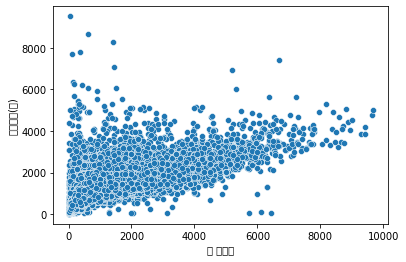

In [111]:
sns.scatterplot(data['총 작업량'], data['작업시간(분)'])
plt.plot()

In [112]:
data = data.astype({"VOYAGE": 'int'})
data

,BERTH_PLAN_LOG_ID,TERMINAL,VESSEL_CD,VOYAGE,BERTHN_DTM,DEP_DTM,LOD_CNT,DIS_CNT,SHFT_CNT,REG_DATE,...,접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤),작업시간(분),입항년도,입항월,입항일,입항시,총 작업량
0,1198857,BNCT,CATO,5,2019-12-30 10:36:00,2019-12-31 23:50:00,1100,539,88,2020-01-01 00:06:05,...,0,0,0,4,2234.0,2019,12,30,10,1727
1,1198903,PNIT,DWFM,32,2019-12-31 17:00:00,2020-01-01 01:00:00,135,61,0,2020-01-01 01:06:56,...,0,0,0,3,480.0,2019,12,31,17,196
3,1198958,PNC,ONIS,30,2019-12-31 11:00:00,2020-01-01 08:00:00,896,1000,0,2020-01-01 05:06:55,...,0,0,0,6,1260.0,2019,12,31,11,1896
4,1198998,HJIT,DPUX,1,2020-01-01 01:00:00,2020-01-01 05:20:00,0,238,0,2020-01-01 07:06:39,...,0,2,1,0,260.0,2020,1,1,1,238
5,1199009,HPNT,HHBS,1,2019-12-31 11:12:00,2020-01-01 04:00:00,405,641,120,2020-01-01 07:36:25,...,2,0,0,2,1008.0,2019,12,31,11,1166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69780,3545253,GWCT,SMLB,1,2022-08-08 12:30:00,2022-08-09 02:00:00,273,577,92,2022-08-08 18:45:27,...,0,0,0,4,810.0,2022,8,8,12,942
69781,3545254,GWCT,NITR,10,2022-08-08 21:30:00,2022-08-09 07:00:00,0,365,0,2022-08-08 18:45:27,...,0,0,0,4,570.0,2022,8,8,21,365
69782,3545255,GWCT,DYHY,13,2022-08-09 08:30:00,2022-08-09 15:30:00,72,52,0,2022-08-08 18:45:27,...,0,0,0,4,420.0,2022,8,9,8,124
69784,3545257,PNC,MGUD,3,2022-08-09 07:00:00,2022-08-10 03:00:00,972,715,354,2022-08-08 18:45:27,...,0,0,0,6,1200.0,2022,8,9,7,2041


In [113]:
data = data[data['LOD_CNT'] >= 0]
data = data[data['DIS_CNT'] >= 0]
data = data[data['SHFT_CNT'] >= 0]
data

,BERTH_PLAN_LOG_ID,TERMINAL,VESSEL_CD,VOYAGE,BERTHN_DTM,DEP_DTM,LOD_CNT,DIS_CNT,SHFT_CNT,REG_DATE,...,접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤),작업시간(분),입항년도,입항월,입항일,입항시,총 작업량
0,1198857,BNCT,CATO,5,2019-12-30 10:36:00,2019-12-31 23:50:00,1100,539,88,2020-01-01 00:06:05,...,0,0,0,4,2234.0,2019,12,30,10,1727
1,1198903,PNIT,DWFM,32,2019-12-31 17:00:00,2020-01-01 01:00:00,135,61,0,2020-01-01 01:06:56,...,0,0,0,3,480.0,2019,12,31,17,196
3,1198958,PNC,ONIS,30,2019-12-31 11:00:00,2020-01-01 08:00:00,896,1000,0,2020-01-01 05:06:55,...,0,0,0,6,1260.0,2019,12,31,11,1896
4,1198998,HJIT,DPUX,1,2020-01-01 01:00:00,2020-01-01 05:20:00,0,238,0,2020-01-01 07:06:39,...,0,2,1,0,260.0,2020,1,1,1,238
5,1199009,HPNT,HHBS,1,2019-12-31 11:12:00,2020-01-01 04:00:00,405,641,120,2020-01-01 07:36:25,...,2,0,0,2,1008.0,2019,12,31,11,1166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69780,3545253,GWCT,SMLB,1,2022-08-08 12:30:00,2022-08-09 02:00:00,273,577,92,2022-08-08 18:45:27,...,0,0,0,4,810.0,2022,8,8,12,942
69781,3545254,GWCT,NITR,10,2022-08-08 21:30:00,2022-08-09 07:00:00,0,365,0,2022-08-08 18:45:27,...,0,0,0,4,570.0,2022,8,8,21,365
69782,3545255,GWCT,DYHY,13,2022-08-09 08:30:00,2022-08-09 15:30:00,72,52,0,2022-08-08 18:45:27,...,0,0,0,4,420.0,2022,8,9,8,124
69784,3545257,PNC,MGUD,3,2022-08-09 07:00:00,2022-08-10 03:00:00,972,715,354,2022-08-08 18:45:27,...,0,0,0,6,1200.0,2022,8,9,7,2041


In [114]:
data.describe()

,BERTH_PLAN_LOG_ID,VOYAGE,LOD_CNT,DIS_CNT,SHFT_CNT,기온(°C),강수량(mm),풍속(m/s),전면수심(m),부지면적(^m),...,접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤),작업시간(분),입항년도,입항월,입항일,입항시,총 작업량
count,6.058500e+04,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000,6.058500e+04,...,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000
mean,2.376542e+06,13.567550,405.205034,410.074986,20.606718,15.051789,0.178703,2.845877,15.760725,7.301365e+05,...,0.383445,0.286391,0.155302,3.149047,963.026228,2020.854865,6.058612,15.789998,11.415169,835.886738
std,8.587231e+05,33.905181,486.443584,505.430018,100.557508,8.975195,1.601741,1.703645,1.304186,2.869424e+05,...,0.860242,0.706030,0.544649,1.971330,622.783766,0.783268,3.348889,8.840416,6.752493,919.607690
min,1.198857e+06,0.000000,0.000000,0.000000,0.000000,-17.500000,0.000000,0.000000,10.000000,1.097530e+05,...,0.000000,0.000000,0.000000,0.000000,10.000000,2019.000000,1.000000,1.000000,0.000000,1.000000
25%,1.540565e+06,2.000000,123.000000,114.000000,0.000000,8.300000,0.000000,1.700000,15.000000,5.530000e+05,...,0.000000,0.000000,0.000000,2.000000,540.000000,2020.000000,3.000000,8.000000,6.000000,281.000000
50%,2.280652e+06,6.000000,247.000000,260.000000,0.000000,15.700000,0.000000,2.600000,16.000000,7.600000e+05,...,0.000000,0.000000,0.000000,4.000000,840.000000,2021.000000,6.000000,16.000000,11.000000,532.000000
75%,3.256673e+06,16.000000,478.000000,494.000000,0.000000,22.400000,0.000000,3.700000,16.500000,8.400000e+05,...,0.000000,0.000000,0.000000,5.000000,1230.000000,2021.000000,9.000000,23.000000,17.000000,1000.000000
max,3.545257e+06,999.000000,5504.000000,6401.000000,2549.000000,35.400000,70.400000,13.800000,18.000000,1.210000e+06,...,4.000000,3.000000,7.000000,6.000000,9516.000000,2022.000000,12.000000,31.000000,23.000000,9669.000000


In [115]:
data.loc[data['TERMINAL'] == 'HKTL', '부두길이(m)'] = 1447

In [117]:
data['부두길이(m)'] = data['부두길이(m)'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60585 entries, 0 to 69785
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BERTH_PLAN_LOG_ID  60585 non-null  int64         
 1   TERMINAL           60585 non-null  object        
 2   VESSEL_CD          60585 non-null  object        
 3   VOYAGE             60585 non-null  int32         
 4   BERTHN_DTM         60585 non-null  datetime64[ns]
 5   DEP_DTM            60585 non-null  datetime64[ns]
 6   LOD_CNT            60585 non-null  int64         
 7   DIS_CNT            60585 non-null  int64         
 8   SHFT_CNT           60585 non-null  int64         
 9   REG_DATE           60585 non-null  datetime64[ns]
 10  기온(°C)             60585 non-null  float64       
 11  강수량(mm)            60585 non-null  float64       
 12  풍속(m/s)            60585 non-null  float64       
 13  위치                 60585 non-null  object        
 14  부두길이(m

In [118]:
data.to_csv('전처리완료데이터.csv')